In [254]:
import pandas as pd

In [255]:
# Load the dataset into a pandas DataFrame

df = pd.read_csv('/content/dataset_for_beats_externship.csv', encoding='ISO-8859-1', delimiter=',', on_bad_lines='skip')

In [256]:
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R1TNTONRLTPEWR,B09FM6PDHP,5.0 out of 5 stars Raycons better up their gam...,Dawson,5,Before I bought these I had raycons. Raycon ea...,"Reviewed in the United States May 16, 2024",AGI3WTFII3HB6JI2GL5PM7J7F7DQ,1,54,Color: BlackStyle: Headphones
1,R11OSJ184YK5L8,B09FM6PDHP,5.0 out of 5 stars Amazing sound quality,Amazon Customer,5,This review is representative of my first impr...,"Reviewed in the United States July 19, 2024",AHDFGIHZLAWNS6GVEJFT6HO4JONQ,1,18,Color: BlackStyle: Headphones
2,R2ND8UB3QKR4XD,B09FM6PDHP,4.0 out of 5 stars JBL for the win.,Amber,4,"Affordable, and great all arounder. Noise canc...","Reviewed in the United States July 29, 2024",AHKSTPYCQ256XNBIJJNN5IKNF43A,1,1,Color: BlueStyle: Headphones
3,R1ATLW9X08QUD0,B09FM6PDHP,"5.0 out of 5 stars Great sound, comfortable in...",Rusty Squeezebox,5,"Took a chance and bought these on prime day, p...","Reviewed in the United States July 25, 2024",AGYXE4BIFF7ICA2CNQ27K5VYPBCQ,1,0,Color: BlackStyle: Headphones
4,R1PDE5V244R06D,B09FM6PDHP,"5.0 out of 5 stars At 50% or more off, these a...",Dru Ha,5,I have one pair for work and one for home/goin...,"Reviewed in the United States November 11, 2023",AFUR62MXQUALQJX5LDFW3KOQBQLA,1,99,Color: BlueStyle: Headphones


In [257]:
df.shape

(1121, 11)

**Check Data Types**


In [258]:
# Check the data types of each column
print(df.dtypes)

review_id             object
product_id            object
title                 object
author                object
rating                object
content               object
timestamp             object
profile_id            object
is_verified           object
helpful_count         object
product_attributes    object
dtype: object


**Identify Unique Data Types Within Columns**

In [259]:
# Check the unique data types in each column (especially useful for 'rating')
for col in df.columns:
    print(f"Unique data types in {col}: {df[col].apply(lambda x: type(x)).unique()}")

Unique data types in review_id: [<class 'str'> <class 'float'>]
Unique data types in product_id: [<class 'str'> <class 'float'>]
Unique data types in title: [<class 'str'> <class 'float'>]
Unique data types in author: [<class 'str'> <class 'float'>]
Unique data types in rating: [<class 'str'> <class 'float'>]
Unique data types in content: [<class 'str'> <class 'float'>]
Unique data types in timestamp: [<class 'str'> <class 'float'>]
Unique data types in profile_id: [<class 'str'> <class 'float'>]
Unique data types in is_verified: [<class 'str'> <class 'float'>]
Unique data types in helpful_count: [<class 'str'> <class 'float'>]
Unique data types in product_attributes: [<class 'str'> <class 'float'>]


In [260]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

review_id             1
product_id            1
title                 1
author                3
rating                3
content               8
timestamp             6
profile_id            6
is_verified           8
helpful_count         8
product_attributes    9
dtype: int64


It looks like the missing values are distributed across various columns, but the number of missing entries is relatively small.

**Numerical column can't have a string datatype entry, So lets convert it to numeric**

In [261]:
# Convert the 'rating' column to numeric, coercing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['helpful_count'] = pd.to_numeric(df['helpful_count'], errors='coerce')
df['is_verified'] = pd.to_numeric(df['is_verified'], errors='coerce')

In [262]:
# Calculating the median of the 'rating' column after conversion
rating_median = df['rating'].median()
helpfulcount_median = df['helpful_count'].median()
verified_median = df['is_verified'].median()

# Fill missing 'rating' values with the median
df['rating'].fillna(rating_median, inplace=True)
df['helpful_count'].fillna(rating_median, inplace=True)
df['is_verified'].fillna(rating_median, inplace=True)

**Drop Missing Values**

As the number of missing values is very small compared to the overall size of our dataset, and those rows aren't critical, we can drop them

Drop Rows: As the missing data is less significant (like 1-9 missing values in a dataset with thousands of rows), and those rows don't add much value, dropping them is generally safe.

In [263]:
# Drop rows with missing values in any column except 'rating'
df = df.dropna(subset=['review_id', 'product_id', 'title', 'author', 'content', 'timestamp', 'profile_id', 'product_attributes'])

In [264]:
# Crosschecking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
dtype: int64


**Check for Duplicates**

In [265]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Drop duplicates
df = df.drop_duplicates()

Number of duplicate rows: 0


**Handle Outliers**

Outliers can skew our analysis, so it’s important to identify and decide how to handle them.

Using statistical methods like the Interquartile Range (IQR) or Z-scores for finding outliers.

In [266]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['rating', 'is_verified', 'helpful_count'], dtype='object')


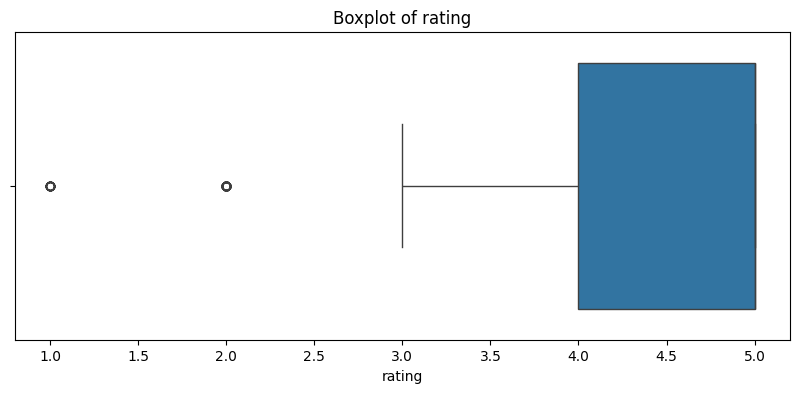

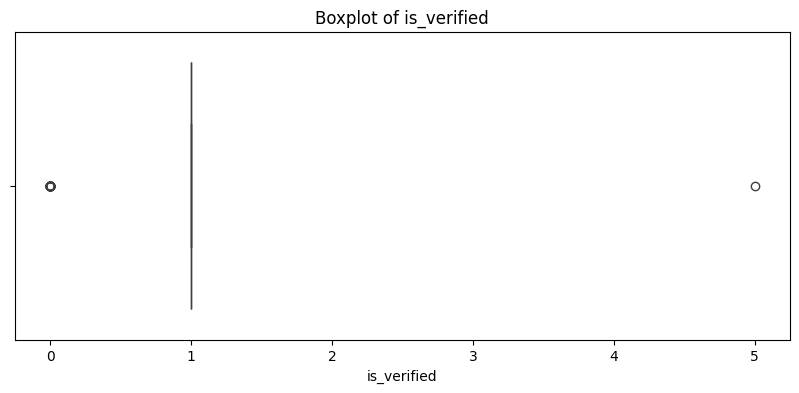

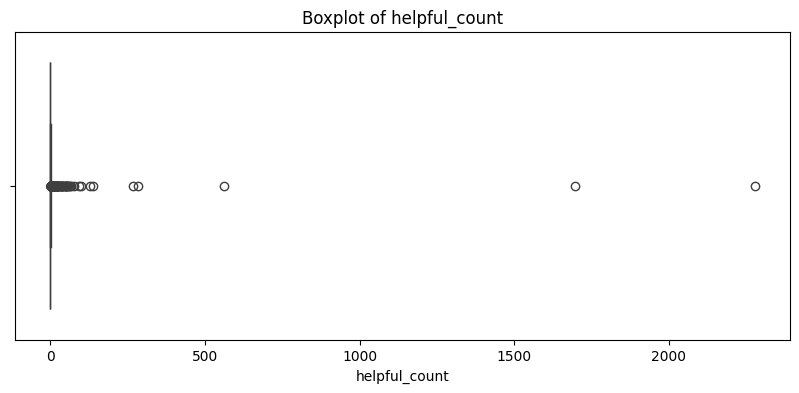

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Remove Outliers**

In [268]:
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

df = df[(df['is_verified'] != 0) & (df['is_verified'] != 5) & (df['helpful_count'] < 500)]

Here's a summary of what I have done:

Filter Out Non-Verified Entries (is_verified):

We're keeping only rows where is_verified is not 0 or 5, meaning we're focusing on entries that are more likely to be valid or trustworthy.

Limit the helpful_count to Less Than 500:

we're filtering out rows where helpful_count is 500 or more, keeping only those entries with a helpful_count of less than 500. This ensures we're working with reviews that are considered helpful but not excessively so, which could indicate manipulation or anomalies.

**Checking the Impact of Outlier Handling**

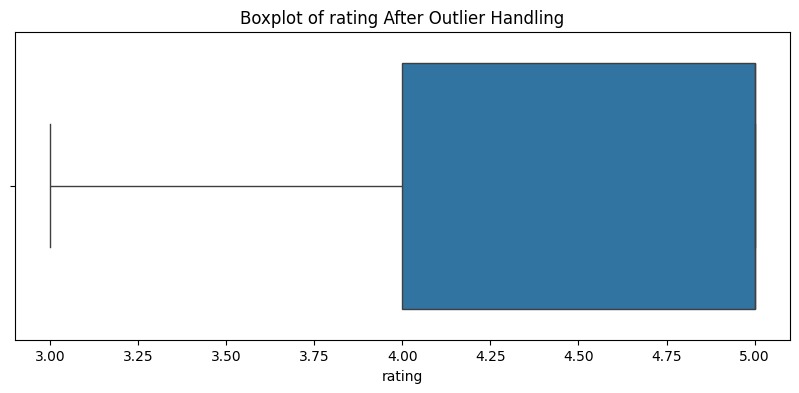

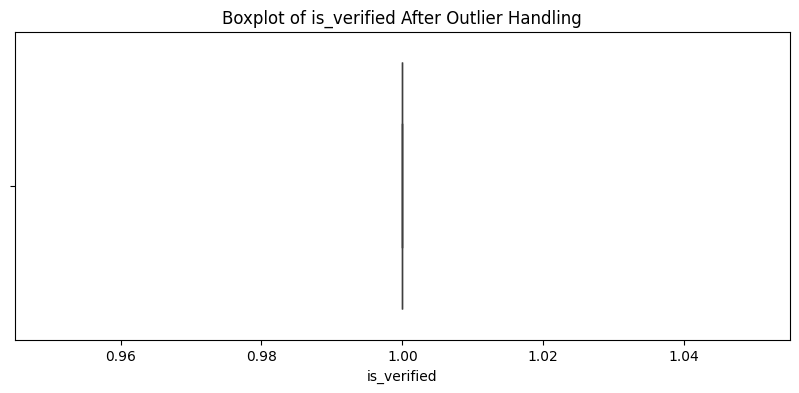

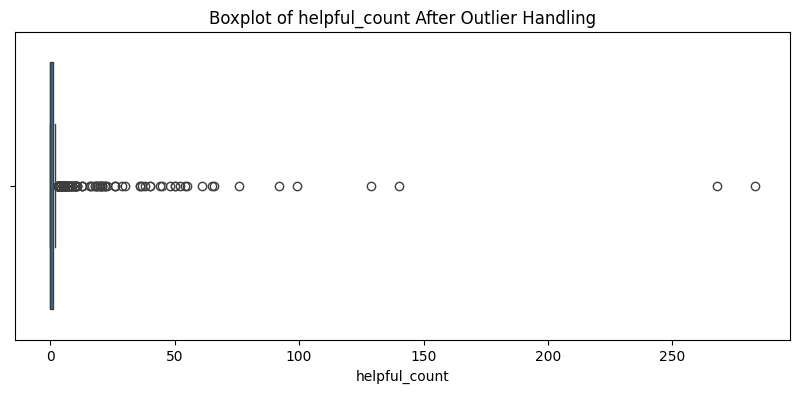

In [269]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} After Outlier Handling')
    plt.show()

In [270]:
df.shape

(985, 11)

**Identify Categorical and Numerical Variables**

In [271]:
# List all columns in the dataset
print(df.columns)

# Identify categorical variables (usually of type 'object' or 'category')
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Variables:")
print(categorical_vars)

# Identify numerical variables (usually of type 'int64' or 'float64')
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Variables:")
print(numerical_vars)

Index(['review_id', 'product_id', 'title', 'author', 'rating', 'content',
       'timestamp', 'profile_id', 'is_verified', 'helpful_count',
       'product_attributes'],
      dtype='object')
Categorical Variables:
Index(['review_id', 'product_id', 'title', 'author', 'content', 'timestamp',
       'profile_id', 'product_attributes'],
      dtype='object')
Numerical Variables:
Index(['rating', 'is_verified', 'helpful_count'], dtype='object')




---

1. **Nominal Variables**:
These variables have categories with no inherent order or ranking:

**product_id**: This identifies different products, but there’s
no order among them. Each product is simply a category.

**author**: The name or identifier of the person who wrote the review. There’s no ranking among authors.

**review_id**: Unique identifier for each review. No inherent order or ranking.

**profile_id**: Identifier for the reviewer's profile. No ranking, just a category.

**product_attributes**: Describes product features like color or style. These are typically nominal because there's no natural order among different colors or styles.

**title**: The title of the review. This is text data and treated as nominal if used categorically.

**content**: The body of the review. This is also text data and can be treated as nominal if you are categorizing it in some way.


---


2. Ordinal Variables:
These variables have categories with a meaningful order:

**rating**: Ratings typically have a natural order (e.g., 1 star < 2 stars < 3 stars, etc.). This makes rating an ordinal variable.


---






**Nominal Variables** (e.g., product_id, author, product_attributes):

**Encoding Method**: One-hot encoding is typically used to convert these into a numerical format.

In [272]:
df = pd.get_dummies(df, columns=['product_id', 'product_attributes'], drop_first=True)